In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as int

In [2]:
#initialize time axis
t = np.logspace(0.1,2,1000,endpoint=True)-1 #this shows the lower end with higher fidelity
#initialize dummy variables, these metrics were reported in Su 2011 for a 5.9 um PECH film exposed to 17000 ppm Isopropanol
D1 = 0.66e-8/(100**2) #m^2/s
D3 = 0.50e-8/(100**2) #m^2/s
h = 5.9e-6 #+-0.4e-6, m
A = 1 #scaling factor, another DOF

## Equations 1-2

(1)
$$\frac{M_t}{M_\infty} = 1-8\sum_{n=0}^{\infty}\frac{1}{\left[(2n+1)\pi\right]^2} e^{(-t/4\tau)\left[(2n+1)\pi\right]^2}$$

(2)
$$\tau = h^2/D$$

In [3]:
def eqn1(D,A,h,t):
    def f(n,*args):
        # kwargs not supported, the order of these input arguments is important, additional error handling recommended
        t = args[0]
        D = args[1]
        h = args[2]
        # print(f'{t}; {D}; {h}')
        tau = h**2/D

        out = np.exp(-(t/(4*tau))*(np.pi*(2*n+1))**2)/((np.pi*(2*n+1))**2)
        # print(n)
        return out

    # Set variables for nsum
    a = 0*np.ones(t.shape)
    b = np.inf*np.ones(t.shape)
    step = 1*np.ones(t.shape)

    #format arguments, must be broadcastable with a, b, and step
    D_broadcast = D*np.ones(t.shape)
    h_broadcast = h*np.ones(t.shape)
    args=np.vstack([D_broadcast,t,h_broadcast])

    # calculate sum of infinite series, runs until desired precision is achieved
    nsum = int.nsum(f,a,b,step=step,args=args)
    mt_v_minf = A*(1-8*nsum.sum)
    return mt_v_minf

eq1_mt_v_minf = eqn1(D1,A,h,t)

## Equation 3

(3)
$$\frac{M_t}{M_\infty} = \frac{2}{h}\sqrt{\frac{Dt}{\pi}}$$

In [ ]:
def eqn3(D,A,h,t):
    
    mt_v_minf = A*(2/h)*np.sqrt((D*t)/np.pi)
    return mt_v_minf

eq3_mt_v_minf = eqn1(D3,A,h,t)

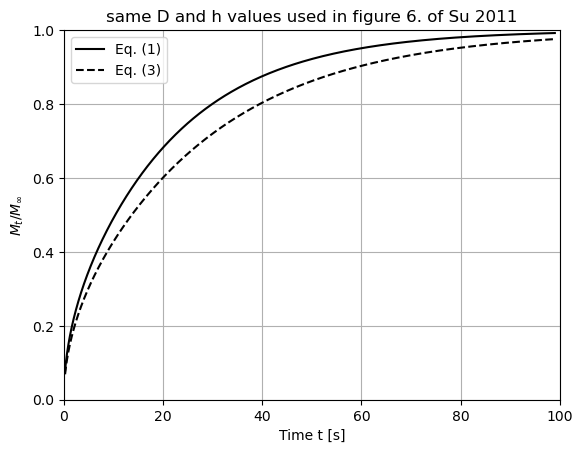

In [ ]:
# ##uncomment to view plot output

# plt.plot(t,eq1_mt_v_minf,"k-",label="Eq. (1)")
# plt.plot(t,eq3_mt_v_minf,"k--",label="Eq. (3)")

# plt.legend()
# plt.grid(True)
# plt.title("same D and h values used in figure 6. of Su 2011")
# plt.ylabel(r'$M_t / M_\infty$')
# plt.xlabel("Time t [s]")
# plt.ylim((0,1))
# plt.xlim((0,100))
# plt.show()

## compare to fig. 6

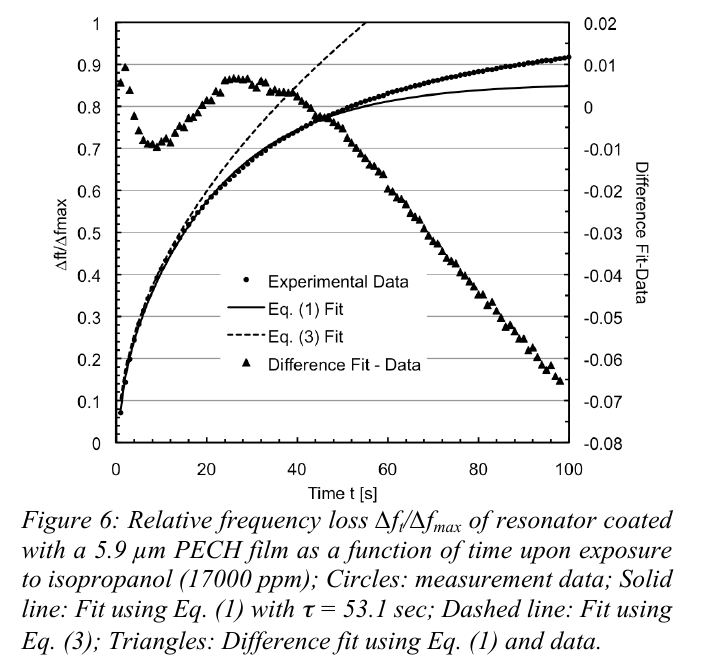

There seems to be a different scaling factor applied to figure 6 that is not replicatable without knowing $f_{\infty}$. It appears that $f_{max}$ is dependent on the range of frequencies that were measured, and is not the actual saturation point of the polymer. I assume this because Eq. (3) Fit seems to exceed $\Delta f_t/\Delta f_{max}=1$ after the PECH was expose to ~56 seconds of IPA at 17000 ppm concentration.